In [9]:
!pip install vaex


In [10]:
import vaex
print(vaex.__version__)


{'vaex': '4.17.0', 'vaex-core': '4.17.1', 'vaex-viz': '0.5.4', 'vaex-hdf5': '0.14.1', 'vaex-server': '0.9.0', 'vaex-astro': '0.9.3', 'vaex-jupyter': '0.8.2', 'vaex-ml': '0.18.3'}


In [ ]:
'''Data Preprocessing
-> import the libraries
-> import the dataset
-> Handle Null values
-> Data Visulizatiion
-> Outlier Detection
-> Split the data into dependent and independent variables
-> Encoding
-> Feature Scaling
-> Split the data into train and test for the model'''

'Data Preprocessing\n-> import the libraries\n-> import the dataset\n-> Handle Null values\n-> Data Visulizatiion\n-> Outlier Detection\n-> Split the data into dependent and independent variables\n-> Encoding\n-> Feature Scaling\n-> Split the data into train and test for the model'

In [11]:
# 1) import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 2) import the dataset
df=pd.read_csv('/content/sample_data/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [13]:
# Move 'isFraud' column to the last position
columns = [col for col in df.columns if col != 'isFraud']  # List of columns without 'isFraud'
columns.append('isFraud')  # Add 'isFraud' to the end of the list

# Reorder the columns in the dataframe
df = df[columns]

# Check if the 'isFraud' column is now in the last position
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
# 3) Handle the Null Values
df.isnull().any()

,0
step,False
type,False
amount,False
nameOrig,False
oldbalanceOrg,False
newbalanceOrig,False
nameDest,False
oldbalanceDest,False
newbalanceDest,False
isFlaggedFraud,False


In [15]:
df.isnull().sum

<bound method DataFrame.sum of           step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0        False  False   False     False          False           False   
1        False  False   False     False          False           False   
2        False  False   False     False          False           False   
3        False  False   False     False          False           False   
4        False  False   False     False          False           False   
...        ...    ...     ...       ...            ...             ...   
6362615  False  False   False     False          False           False   
6362616  False  False   False     False          False           False   
6362617  False  False   False     False          False           False   
6362618  False  False   False     False          False           False   
6362619  False  False   False     False          False           False   

         nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  isFraud  
0           False           False           False           False    False  
1           False           False           False           False    False  
2           False           False           False           False    False  
3           False           False           False           False    False  
4           False           False           False           False    False  
...           ...             ...             ...             ...      ...  
6362615     False           False           False           False    False  
6362616     False           False           False           False    False  
6362617     False           False           False           False    False  
6362618     False           False           False           False    False  
6362619     False           False           False           False    False  

[6362620 rows x 11 columns]>

In [16]:
df.shape

(6362620, 11)

In [17]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFlaggedFraud  int64  
 10  isFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
# Convert columns to float32 for storage efficiency in df
df['amount'] = df['amount'].astype('float32')
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['oldbalanceDest'] = df['oldbalanceDest'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')
df['isFraud'] = df['isFraud'].astype('uint8')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('uint8')




In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float32
 3   nameOrig        object 
 4   oldbalanceOrg   float32
 5   newbalanceOrig  float32
 6   nameDest        object 
 7   oldbalanceDest  float32
 8   newbalanceDest  float32
 9   isFlaggedFraud  uint8  
 10  isFraud         uint8  
dtypes: float32(5), int64(1), object(3), uint8(2)
memory usage: 327.7+ MB


Number of outliers in amount: 338078
          amount  isFraud
85  1.505626e+06        0
86  5.540270e+05        0
88  7.615074e+05        0
89  1.429052e+06        0
93  5.838484e+05        0
Number of outliers in oldbalanceOrg: 1112507
    oldbalanceOrg  isFraud
14   503264.00000        0
37   300481.00000        0
38   297689.59375        0
62   882770.00000        0
63   874042.25000        0
Number of outliers in newbalanceOrig: 1053391
     newbalanceOrig  isFraud
14     4.991652e+05        0
62     8.740422e+05        0
63     8.714428e+05        0
241    6.309147e+06        0
242    6.307879e+06        0
Number of outliers in oldbalanceDest: 786135
     oldbalanceDest  isFraud
94        3470595.0        0
96        5195482.0        0
113       5776776.5        0
156       5862200.0        0
171       6048647.5        0
Number of outliers in newbalanceDest: 738527
    newbalanceDest  isFraud
48       6453431.0        0
83       3420103.0        0
84      19169204.0        0
85  

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

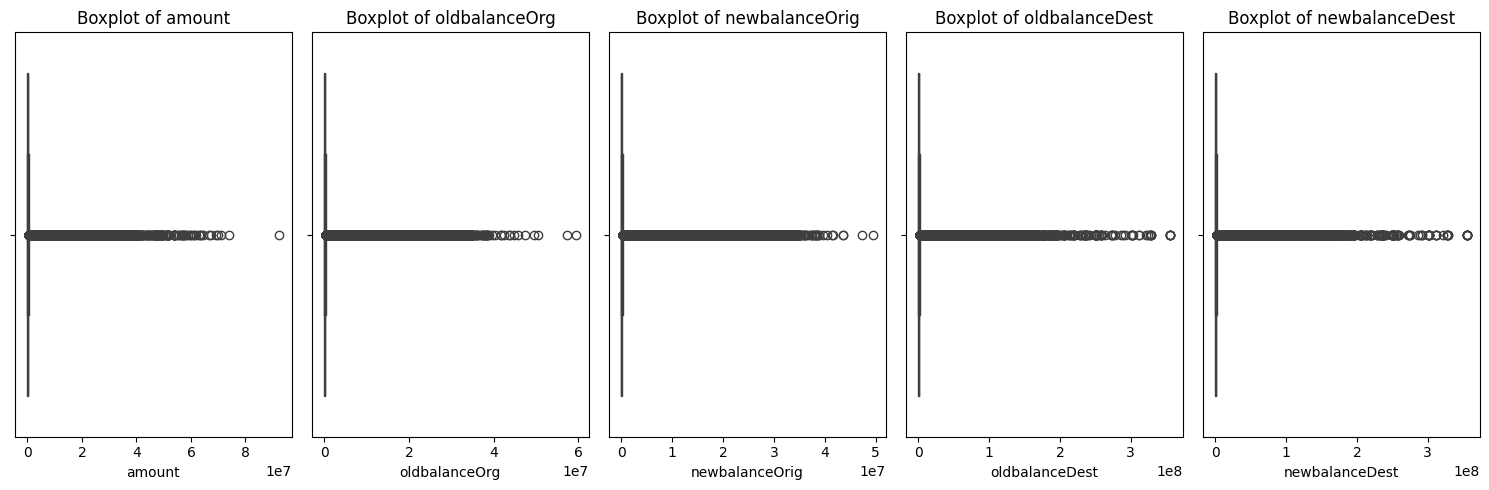

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


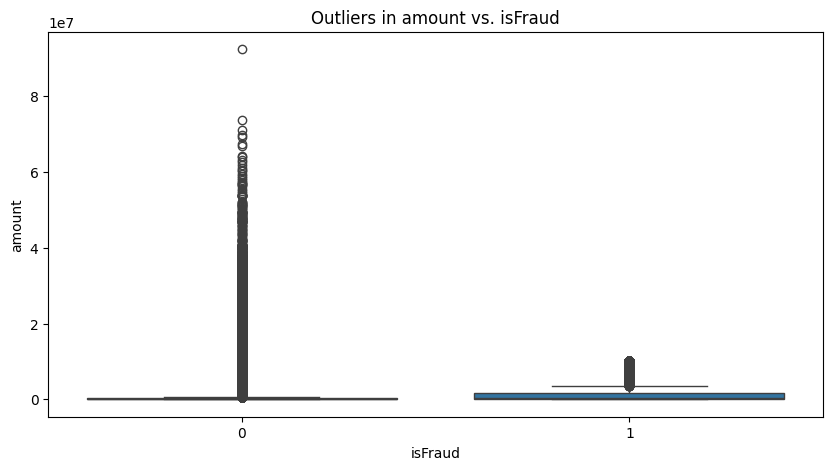

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


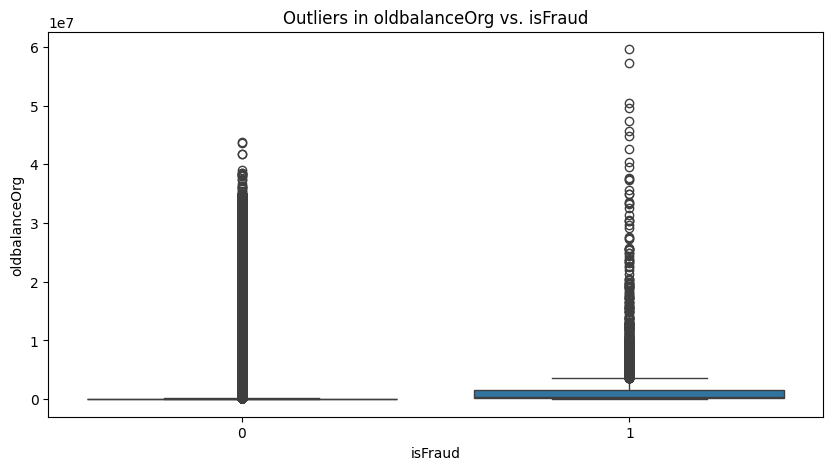

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


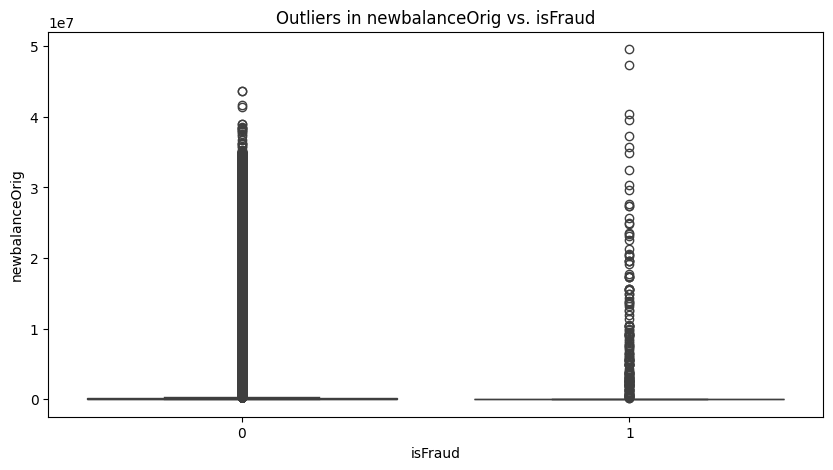

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


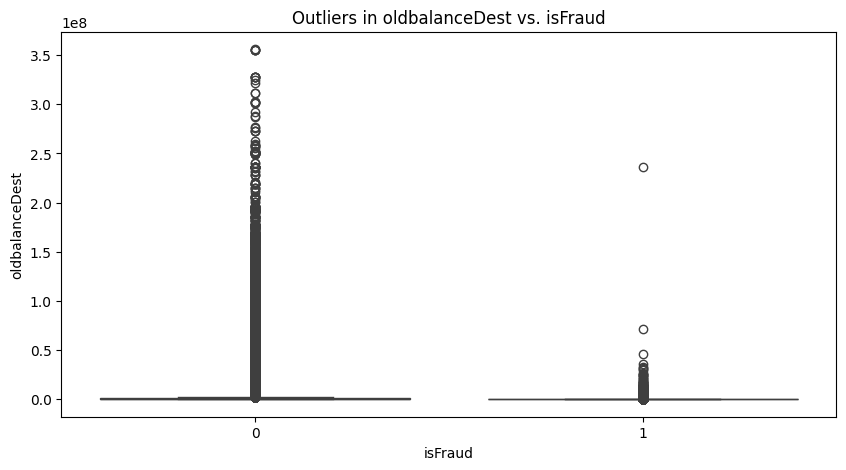

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


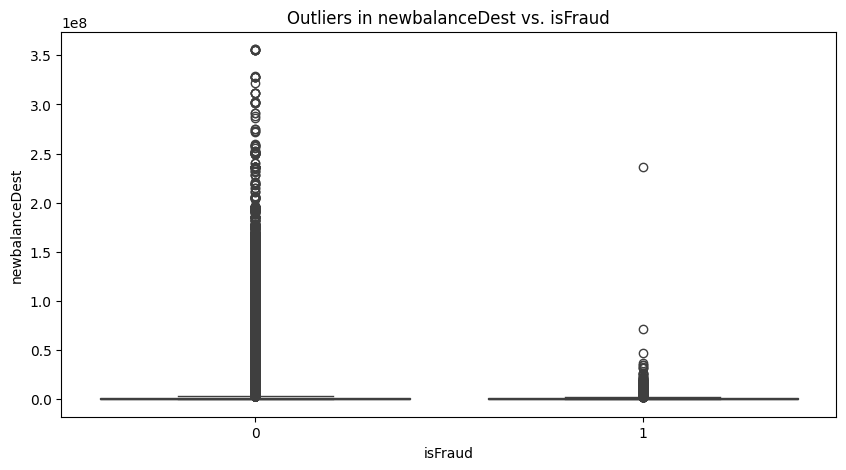

In [21]:
# Function to identify outliers using IQR
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Analyze outliers in relevant columns
outlier_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

outlier_summary = {}

for col in outlier_columns:
    outliers = identify_outliers_iqr(df, col)
    outlier_summary[col] = outliers
    print(f"Number of outliers in {col}: {len(outliers)}")

    # Optionally, display some of the outliers
    print(outliers[[col, 'isFraud']].head())  # Show outliers along with isFraud

# Visualization of outliers using boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Additional analysis to check correlation with isFraud
for col in outlier_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='isFraud', y=col, data=df)
    plt.title(f'Outliers in {col} vs. isFraud')
    plt.show()


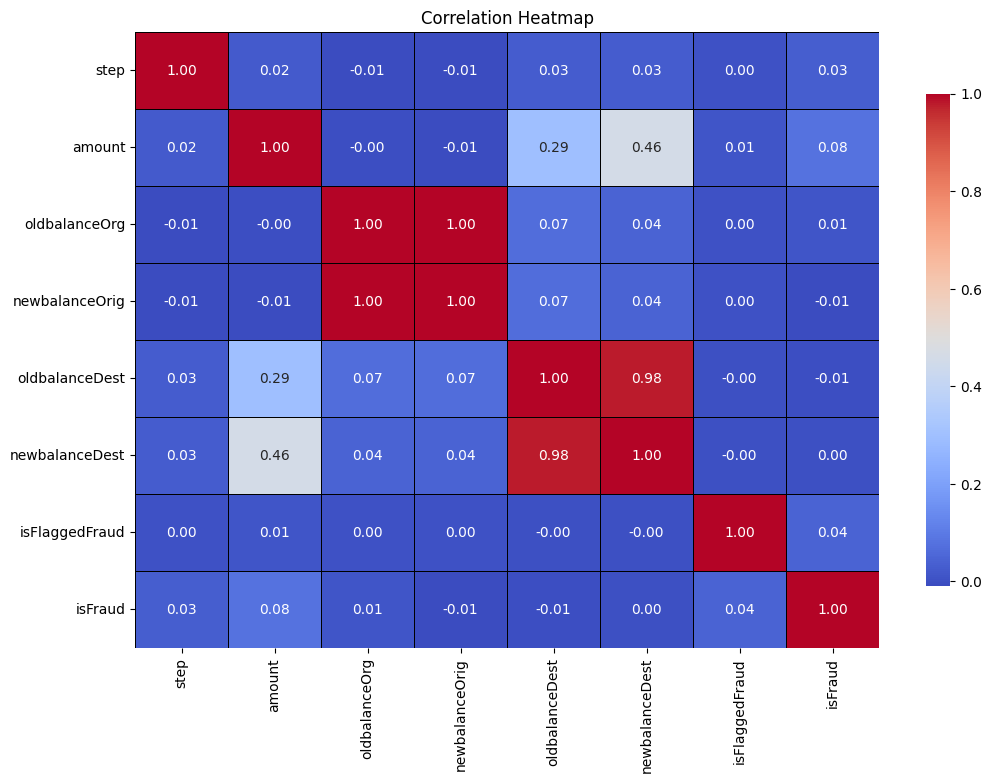

In [22]:
# Calculate the correlation matrix, ensuring only numeric columns are included
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap with annotations
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Drop any unnecessary columns such as 'nameOrig' and 'nameDest' (as they are IDs)
df= df.drop(['nameOrig', 'nameDest','step'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,PAYMENT,9839.639648,170136.0,160296.359375,0.0,0.0,0,0
1,PAYMENT,1864.280029,21249.0,19384.720703,0.0,0.0,0,0
2,TRANSFER,181.000000,181.0,0.000000,0.0,0.0,0,1
3,CASH_OUT,181.000000,181.0,0.000000,21182.0,0.0,0,1
4,PAYMENT,11668.139648,41554.0,29885.859375,0.0,0.0,0,0


In [25]:
# Step 1: Encode the 'type' categorical feature using One-Hot Encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [26]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.639648,170136.0,160296.359375,0.0,0.0,0,0,False,False,True,False
1,1864.280029,21249.0,19384.720703,0.0,0.0,0,0,False,False,True,False
2,181.000000,181.0,0.000000,0.0,0.0,0,1,False,False,False,True
3,181.000000,181.0,0.000000,21182.0,0.0,0,1,True,False,False,False
4,11668.139648,41554.0,29885.859375,0.0,0.0,0,0,False,False,True,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float32
 1   oldbalanceOrg   float32
 2   newbalanceOrig  float32
 3   oldbalanceDest  float32
 4   newbalanceDest  float32
 5   isFlaggedFraud  uint8  
 6   isFraud         uint8  
 7   type_CASH_OUT   bool   
 8   type_DEBIT      bool   
 9   type_PAYMENT    bool   
 10  type_TRANSFER   bool   
dtypes: bool(4), float32(5), uint8(2)
memory usage: 157.8 MB


In [28]:
# Convert boolean columns to 0/1 using astype(int)
df['type_CASH_OUT'] = df['type_CASH_OUT'].astype('uint8')
df['type_DEBIT'] = df['type_DEBIT'].astype('uint8')
df['type_PAYMENT'] = df['type_PAYMENT'].astype('uint8')
df['type_TRANSFER'] = df['type_TRANSFER'].astype('uint8')



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float32
 1   oldbalanceOrg   float32
 2   newbalanceOrig  float32
 3   oldbalanceDest  float32
 4   newbalanceDest  float32
 5   isFlaggedFraud  uint8  
 6   isFraud         uint8  
 7   type_CASH_OUT   uint8  
 8   type_DEBIT      uint8  
 9   type_PAYMENT    uint8  
 10  type_TRANSFER   uint8  
dtypes: float32(5), uint8(6)
memory usage: 157.8 MB


In [30]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.639648,170136.0,160296.359375,0.0,0.0,0,0,0,0,1,0
1,1864.280029,21249.0,19384.720703,0.0,0.0,0,0,0,0,1,0
2,181.000000,181.0,0.000000,0.0,0.0,0,1,0,0,0,1
3,181.000000,181.0,0.000000,21182.0,0.0,0,1,1,0,0,0
4,11668.139648,41554.0,29885.859375,0.0,0.0,0,0,0,0,1,0


In [31]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the pandas DataFrame `df`
X = df.drop('isFraud', axis=1)
y = df['isFraud']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new pandas DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['isFraud'] = y_resampled




In [32]:
# Convert pandas DataFrame to Vaex DataFrame
df_vaex = vaex.from_pandas(df_resampled)

# Export it to an HDF5 file
df_vaex=df_vaex.export_hdf5('fraud_data.hdf5')

In [33]:
df_vaex = vaex.open('fraud_data.hdf5')

In [34]:
# Now define features and target
features = df_vaex.get_column_names()  # Get all columns
target = 'isFraud'

# Remove 'isFraud' from the features
if target in features:
    features.remove(target)

print("Features:", features)
print("Target:", target)

Features: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
Target: isFraud


In [35]:


import numpy as np
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Initialize the incremental model
model = SGDClassifier()

# Use Vaex's IncrementalPredictor
vaex_model = IncrementalPredictor(features=features, target=target, model=model, batch_size=500000)

# Shuffle and split the data into training and test sets
df_vaex = df_vaex.shuffle()
df_train, df_test = df_vaex.ml.train_test_split(test_size=0.2)

# Get unique classes for the target and convert to a NumPy array
unique_classes = np.array(df_train[target].unique())

# Set the classes for the model
vaex_model.model.classes_ = unique_classes

# Train the model incrementally
vaex_model.fit(df=df_train, progress='widget')

# Transform the test set to get predictions
df_test = vaex_model.transform(df_test)

# Extract predictions and true labels
y_pred = vaex_model.model.predict(df_test[features].values)
y_true = df_test[target].values

# Evaluate the model using common classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Display evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")






/usr/local/lib/python3.10/dist-packages/vaex/ml/__init__.py:28: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


Accuracy: 0.8946675988280576
Precision: 0.8526218745516991
Recall: 0.9542322912108496
F1 Score: 0.9005699965238679
Confusion Matrix:
[[1061574  209577]
 [  58153 1212459]]


In [36]:
import numpy as np
import vaex
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import joblib

# Assume df_vaex is already defined and pre-processed
# Define features and target
features = df_vaex.column_names[:-1]  # Include all columns except the last
target = 'isFraud'

# Shuffle and split the data into training and test sets
df_vaex = df_vaex.shuffle()
df_train, df_test = df_vaex.ml.train_test_split(test_size=0.2)

# Initialize the incremental model for SGDClassifier
sgd_model = SGDClassifier()

# Use Vaex's IncrementalPredictor
vaex_model = IncrementalPredictor(features=features, target=target, model=sgd_model, batch_size=500000)

# Get unique classes for the target
unique_classes = np.array(df_train[target].unique())

# Set the classes for the model
vaex_model.model.classes_ = unique_classes

# Train the model incrementally
vaex_model.fit(df=df_train, progress='widget')

# Transform the test set to get predictions
df_test = vaex_model.transform(df_test)







/usr/local/lib/python3.10/dist-packages/vaex/ml/__init__.py:28: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


In [ ]:
# Extract predictions and true labels for SGDClassifier
# Convert Vaex DataFrame to Pandas DataFrame for predictions
y_pred_sgd = vaex_model.model.predict(df_test[features].to_pandas_df().values)

# Directly access the target values as a NumPy array
y_true_sgd = df_test[target].values.flatten()  # Use .flatten() to ensure it's 1D

# Evaluate the SGD model using common classification metrics
accuracy_sgd = accuracy_score(y_true_sgd, y_pred_sgd)
precision_sgd = precision_score(y_true_sgd, y_pred_sgd)
recall_sgd = recall_score(y_true_sgd, y_pred_sgd)
f1_sgd = f1_score(y_true_sgd, y_pred_sgd)
conf_matrix_sgd = confusion_matrix(y_true_sgd, y_pred_sgd)

# Display evaluation results for SGDClassifier
print(f"SGDClassifier Evaluation Results:")
print(f"Accuracy: {accuracy_sgd}")
print(f"Precision: {precision_sgd}")
print(f"Recall: {recall_sgd}")
print(f"F1 Score: {f1_sgd}")
print(f"Confusion Matrix:\n{conf_matrix_sgd}")

# Prepare the data for RandomForestClassifier
X_train = df_train[features].to_pandas_df()  # Convert to Pandas DataFrame
y_train = df_train[target].values.flatten()  # Directly access target values as 1D array

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized search for best hyperparameters for RandomForest
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid,
                                 n_iter=10, cv=3, verbose=2, n_jobs=-1)

# Fit the RandomizedSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters for RandomForest
print(f"Best Parameters for RandomForest: {grid_search.best_params_}")

# Use the best parameters to train the RandomForest model
best_model = RandomForestClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Transform the test set for RandomForest predictions
y_pred_rf = best_model.predict(df_test[features].to_pandas_df().values)
y_true_rf = df_test[target].values.flatten()  # Directly access target values as 1D array

# Evaluate the RandomForest model
accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
precision_rf = precision_score(y_true_rf, y_pred_rf)
recall_rf = recall_score(y_true_rf, y_pred_rf)
f1_rf = f1_score(y_true_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_true_rf, y_pred_rf)

# Display evaluation results for RandomForest
print(f"\nRandomForest Evaluation Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

# Save the trained models
joblib.dump(vaex_model.model, 'fraud_detection_sgd_model.pkl')
joblib.dump(best_model, 'fraud_detection_rf_model.pkl')





SGDClassifier Evaluation Results:
Accuracy: 0.8910346873410306
Precision: 0.8427328360799831
Recall: 0.9617486596544188
F1 Score: 0.8983158624376232
Confusion Matrix:
[[1041397  228306]
 [  48658 1223402]]
Fitting 3 folds for each of 10 candidates, totalling 30 fits
